<a href="https://colab.research.google.com/github/MohammadAliAfsahi/Machine-Learning-and-Deep-Learning/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - MNIST dataset

In [0]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.ndimage.interpolation import shift

### implementing cross validation manually
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
###

%matplotlib inline

In [50]:
mnist = fetch_openml('mnist_784')

mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [51]:
X, y = mnist['data'], mnist['target']

X.shape

(70000, 784)

In [52]:
y.shape

(70000,)

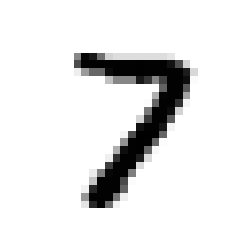

'7'

In [53]:
image = X[4000]

digit_image = image.reshape(28, 28)

plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')

plt.show()

y[4000]

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_training_set = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_training_set], y[shuffle_training_set]

In [55]:
# Let's first create a binary classifier

y_train_7 = (y_train == '7')

y_test_7 = (y_test == '7')

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_7)

sgd_clf.predict([image])

array([ True])

In [56]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_7):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_7[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_7[test_index]
  
  clone_clf.fit(X_train_folds, y_train_folds)
  y_prediction = clone_clf.predict(X_test_fold)
  No_correct = sum(y_prediction == y_test_fold)
  print(No_correct / len(y_prediction))

0.9805509724513775
0.97985
0.96044802240112


In [57]:
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring='accuracy' )

array([0.98055097, 0.97985   , 0.96044802])

In [58]:
class Not7Classifier(BaseEstimator):
  
  def fit(self, X, y=None):
    pass
  
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

not_7_clf = Not7Classifier()

cross_val_score(not_7_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.89645, 0.8963 , 0.894  ])

In [59]:
y_train_prediction = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

confusion_matrix(y_train_7, y_train_prediction)

array([[52672,  1063],
       [  520,  5745]])

In [60]:
precision_score(y_train_7, y_train_prediction) # TP / ( TP + FP)

0.8438601645123385

In [61]:
recall_score(y_train_7, y_train_prediction) # TP / ( TP + FN )

0.9169992019154031

In [62]:
f1_score(y_train_7, y_train_prediction)

0.8789107320431425

In [63]:
y_scores = sgd_clf.decision_function([image])

y_scores

array([3443.48433716])

In [64]:
threshold = 0

y_digit_pred = (y_scores > threshold)

y_digit_pred

array([ True])

In [65]:
threshold = 10000

y_digit_pred = (y_scores > threshold)

y_digit_pred # in any case we are changing threshold to find the point where our prediction becomes true or false. However it's clear 
             # from y_scoeres output, what can we choose as threshold in order to get desirable prediction

array([False])

In [0]:
# in order to find threshold more accurate and professionaly...
y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv=5, method='decision_function') # returns decision scores instead of predictions

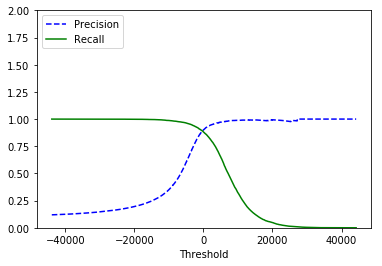

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0, 2])
  
  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

In [68]:
print(y_train_prediction)

print(y_scores)

[False  True False ...  True False  True]
[-12128.61968811  11985.10694895 -16029.00516505 ...  -6621.61149334
 -76580.37497728   7604.86535318]


In [69]:
(y_train_prediction == (y_scores > 0)).all() # output is False because for thresholds greater than score returend by decision_funcion
                                            # all are not 7 which is our image we want to predict

False

In [70]:
y_train_pred_90 = (y_scores > 1500)

precision_score(y_train_7, y_train_pred_90)

0.9363262385977463

In [71]:
recall_score(y_train_7, y_train_pred_90)

0.8355945730247406

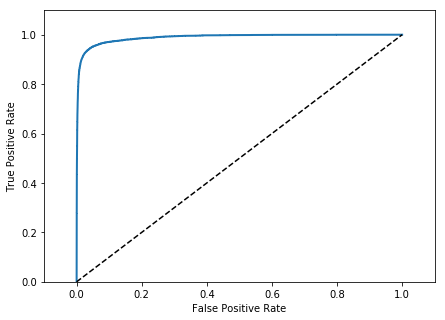

In [72]:
fpr, tpr, thresholds = roc_curve(y_train_7, y_scores) # false positive rate, true positive rate

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([-0.1, 1.1, 0, 1.1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plt.figure(figsize=(7, 5))
plot_roc_curve(fpr, tpr)
plt.show()

In [73]:
# a good classifier has roc_auc_score equal to 1 and random classifier has roc_auc_score equal to 0.5
roc_auc_score(y_train_7, y_scores)

0.988612025657822

In [74]:
forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, method='predict_proba')


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


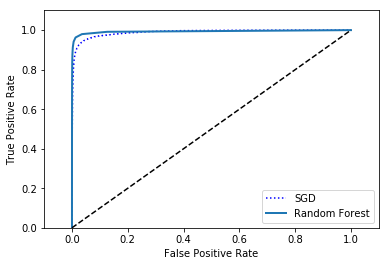

In [75]:
y_scores_forest = y_probas_forest[:, 1]

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_7, y_scores_forest)

plt.plot(fpr, tpr, "b:", label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='best')
plt.show()

In [76]:
roc_auc_score(y_train_7, y_scores_forest)

0.9932559809374594

In [77]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=7)

precision_score(y_train_7, y_train_pred_forest)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.9839647577092511

In [78]:
recall_score(y_train_7, y_train_pred_forest)

0.8913008778930567

In [79]:
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([image])

array(['7'], dtype='<U1')

In [80]:
digit_score = sgd_clf.decision_function([image])

digit_score

array([[-29450.08300576, -26237.9979303 ,  -5653.3609139 ,
         -5237.59555355, -20724.667352  , -10102.35961077,
        -35257.55000675,   4965.09479944,  -6478.29381869,
         -9197.19285718]])

In [81]:
np.argmax(digit_score)

7

In [82]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [83]:
sgd_clf.classes_[7] # in this case indices are equal to real values of classes

'7'

In [84]:
# use One vs One classifier. SGDClassifier uses One vs All classifier
OvO_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

OvO_clf.fit(X_train, y_train)

OvO_clf.predict([image])

array(['7'], dtype=object)

In [85]:
len(OvO_clf.estimators_) # MNIST has 10 digits. using OvO strategy needs ( N * (N-1) ) / 2 classifiers

45

In [86]:
forest_clf.fit(X_train, y_train)

forest_clf.predict([image])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['7'], dtype=object)

In [87]:
forest_clf.predict_proba([image])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [88]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.86542691, 0.86344317, 0.86177927])

In [89]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.89907019, 0.89944497, 0.89918488])

In [90]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_pred)

conf_mx

array([[5599,    0,   14,    7,    9,   40,   34,    5,  214,    1],
       [   1, 6413,   43,   23,    3,   42,    4,    8,  195,   10],
       [  28,   27, 5242,   89,   70,   21,   80,   38,  357,    6],
       [  27,   18,  123, 5222,    2,  201,   29,   43,  398,   68],
       [  13,   14,   43,   14, 5219,   13,   37,   26,  307,  156],
       [  26,   16,   28,  153,   52, 4446,   80,   18,  531,   71],
       [  27,   20,   48,    2,   38,   86, 5554,    5,  138,    0],
       [  20,   14,   55,   25,   51,   11,    3, 5700,  183,  203],
       [  15,   65,   45,   83,    3,  126,   29,    6, 5432,   47],
       [  22,   20,   31,   57,  125,   35,    1,  171,  360, 5127]])

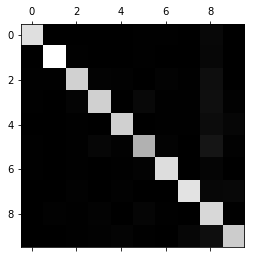

In [91]:
# the confusion matrix was really confusing. let's take a look at image of this matrix

plt.matshow(conf_mx, cmap=plt.cm.gray)

plt.show()

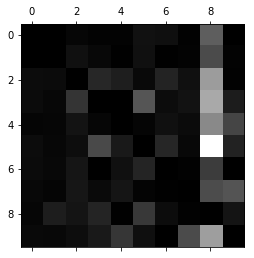

In [92]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

In [93]:
y_train_large = (y_train.astype(np.int64) >= 7)
y_train_odd = (y_train.astype(np.int64) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([image])

array([[ True,  True]])

In [94]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9769956484763824

In [0]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [0]:
some_index = 5500
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [98]:
param_grid = [{'weights':['uniform', 'distance'], 'n_neighbors':[3, 4, 5]}]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
grid_search.best_params_

In [0]:
grid_search.best_score_

In [0]:
y_pred = grid_search.predict(X_test)

accuracy_score(y_pred, y_test)

In [0]:
# shift image one pixel to left, down

def shift_image(image, dx, dy):
  image = image.reshape((28, 28))
  shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
  return shifted_image.reshape([-1])
  

In [0]:
img = X_train[1000]

shifted_image_down = shift_image(img, 0, 5)
shifted_image_left = shift_image(img, -5, 0)

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title('Orginal', fontsize=14)
plt.imshow(img.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.subplot(132)
plt.title("Shifted Down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.subplot(133)
plt.title("Shifted Left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.show()

In [0]:
X_train_augmented = [im for im in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, -1), (0, 1)):
  for im, label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(im, dx, dy))
    y_train_augmented.append(label)
    
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [0]:
shuffle_idx = np.random.permutation(len(X_train_augmented))

X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [0]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [0]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [0]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# Titanic - kaggle competition

In [102]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir /content/kaggle
import json
token = {"username":"mohammadalice","key":"db59dcd8dcb2ba0a1a98a1834b7eb6ac"}
with open('/content/kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

!mkdir ~/.kaggle

!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle config set -n path -v /content/kaggle

!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c titanic

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists
- path is now set to: /content/kaggle
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 58.5MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 25.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.69MB/s]
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [0]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [0]:
train_data = pd.read_csv("/content/kaggle/competitions/titanic/train.csv")
test_data = pd.read_csv("/content/kaggle/competitions/titanic/test.csv")

In [108]:
train_data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [110]:
train_data.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [111]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [112]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [113]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [114]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
    
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    return X[self.attribute_names]

In [0]:
numerical_pipeline = Pipeline([
    ('select_numerical', DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare'])),
    ('imputer', SimpleImputer(strategy='median'))
])

In [126]:
numerical_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [0]:
# categorical columns imputer
class MostFrequentImputer(BaseEstimator, TransformerMixin):
  
  def fit(self, X, y=None):
    self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index=X.columns)
    return self
  
  def transform(self, X, y=None):
    return X.fillna(self.most_frequent_)
  

In [0]:
categorical_pipeline = Pipeline([
    ('select_categorical', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])),
    ('imputer', MostFrequentImputer()),
    ('categorical_encoder', OneHotEncoder(sparse=False))
])

In [135]:
categorical_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [0]:
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline),
    ('cat_piepline', categorical_pipeline)
])

In [0]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [0]:
y_train = train_data['Survived']

In [144]:
svm_clf = SVC(gamma='auto')

svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
X_test = preprocess_pipeline.fit_transform(test_data)

y_prediction = svm_clf.predict(X_test)

In [147]:
svm_score = cross_val_score(svm_clf, X_train, y_train, cv=10)

svm_score.mean()

0.7365250822835092

In [152]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)

forest_scores.mean()

0.8149526160481217

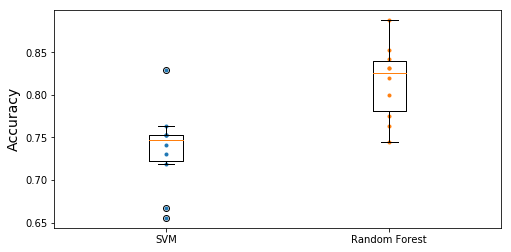

In [159]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_score, '.')
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_score, forest_scores], labels=('SVM', 'Random Forest'))
plt.ylabel('Accuracy', fontsize=14)
plt.show()

# Spam Classifier

In [0]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
  if not os.path.isdir(spam_path):
      os.makedirs(spam_path)
  for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
      path = os.path.join(spam_path, filename)
      if not os.path.isfile(path):
          urllib.request.urlretrieve(url, path)
      tar_bz2_file = tarfile.open(path)
      tar_bz2_file.extractall(path=SPAM_PATH)
      tar_bz2_file.close()



fetch_spam_data()

In [0]:
import email
import email.policy
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
import re
from html import unescape
import nltk
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

In [8]:
!pip install urlextract
import urlextract

In [0]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [10]:
len(ham_filenames)

2500

In [11]:
len(spam_filenames)

500

In [0]:
def load_email(is_spam, filename, spam_path=SPAM_PATH):
  directory = "spam" if is_spam else "easy_ham"
  with open(os.path.join(spam_path, directory, filename), "rb") as f:
    return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [0]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [14]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [15]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [0]:
def get_email_structure(email):
  if isinstance(email, str):
      return email
  payload = email.get_payload()
  if isinstance(payload, list):
      return "multipart({})".format(", ".join([
          get_email_structure(sub_email)
          for sub_email in payload
      ]))
  else:
      return email.get_content_type()


In [0]:
def structures_counter(emails):
  structures = Counter()
  for email in emails:
      structure = get_email_structure(email)
      structures[structure] += 1
  return structures

In [18]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [19]:
structures_counter(spam_emails).most_common() 

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [20]:
for header, value in spam_emails[0].items():
  print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [21]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [0]:
X = np.array(ham_emails + spam_emails)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
def html_to_plain_text(html):
  text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
  text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
  text = re.sub('<.*?>', '', text, flags=re.M | re.S)
  text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
  return unescape(text)

html_spam_emails = [email for email in X_train[y_train == 1] if get_email_structure(email) == "text/html"]

sample_html_spam = html_spam_emails[7]

print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [24]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [26]:
def email_to_text(email):
  html = None
  for part in email.walk():
    ctype = part.get_content_type()
    if not ctype in ("text/plain", "text/html"):
        continue
    try:
        content = part.get_content()
    except: # in case of encoding issues
        content = str(part.get_payload())
    if ctype == "text/plain":
        return content
    else:
        html = content
  if html:
    return html_to_plain_text(html)
   

print(email_to_text(sample_html_spam)[:100], "...") 




OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


In [27]:
stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
  print(word, "=>", stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [28]:
url_extractor = urlextract.URLExtract()
print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [0]:
class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
  
  def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True, replace_urls=True, replace_numbers=True, stemming=True):
    self.strip_headers = strip_headers
    self.lower_case = lower_case
    self.remove_punctuation = remove_punctuation
    self.replace_urls = replace_urls
    self.replace_numbers = replace_numbers
    self.stemming = stemming
  
  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    X_transformed = []
    for email in X:
      text = email_to_text(email) or ""
      if self.lower_case:
        text = text.lower()
      if self.replace_urls and url_extractor is not None:
        urls = list(set(url_extractor.find_urls(text)))
        urls.sort(key=lambda url: len(url), reverse=True)
        for url in urls:
          text = text.replace(url, " URL ")
      if self.replace_numbers:
        text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
      if self.remove_punctuation:
        text = re.sub(r'\W+', ' ', text, flags=re.M)
      word_counts = Counter(text.split())
      if self.stemming and stemmer is not None:
          stemmed_word_counts = Counter()
          for word, count in word_counts.items():
            stemmed_word = stemmer.stem(word)
            stemmed_word_counts[stemmed_word] += count
            
          word_counts = stemmed_word_counts
      X_transformed.append(word_counts)
    
    return np.array(X_transformed)

In [30]:
X_few = X_train[:3] 
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

In [0]:
class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
  
  def __init__(self, vocabulary_size=1000):
    self.vocabulary_size= vocabulary_size
  
  def fit(self, X, y=None):
    total_count = Counter()
    for word_count in X:
      for word, count in word_count.items():
        total_count[word] += min(count, 10)
    
    most_common_word = total_count.most_common()[:self.vocabulary_size]
    self.most_common_word =  most_common_word
    self.vocabulary_ = { word : index + 1 for index, (word, count) in enumerate(most_common_word) }
    return self
  
  def transform(self, X, y=None):
    rows, cols, data = [], [], []
    for row, word_count in enumerate(X):
      for word, count in word_count.items():
        rows.append(row)
        cols.append(self.vocabulary_.get(word, 0))
        data.append(count)
    return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))
  

In [32]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [33]:
X_few_vectors.toarray()

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
       [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]], dtype=int64)

In [34]:
vocab_transformer.vocabulary_

{'all': 6,
 'and': 3,
 'by': 10,
 'christian': 8,
 'in': 7,
 'of': 2,
 'on': 9,
 'the': 1,
 'to': 4,
 'url': 5}

In [0]:
preprocess_pipeline = Pipeline([
    ('email_to_word_counter', EmailToWordCounterTransformer()),
    ('word_counter_to_vector', WordCounterToVectorTransformer())
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [36]:
log_clf = LogisticRegression(solver='liblinear', random_state=42)

score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)

score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.981, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.985, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .................................... , score=0.991, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished


0.9858333333333333

In [44]:
X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf.fit(X_train_transformed, y_train)

y_prediction = log_clf.predict(X_test_transformed)

print("Precision:{:.2f}\t".format(100 * precision_score(y_test, y_prediction)))

print("Recall:{:.2f}\t".format( 100 * recall_score(y_test, y_prediction)))

Precision:95.88	
Recall:97.89	
